# Loan Prediction

this project is a classification project where we predict the loan is give or not with the help of given dataset.


## import  libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier


import pickle

In [3]:
#load the dataset
training_data=pd.read_csv("train_ctrUa4K.csv")
testing_data=pd.read_csv('test_lAUu6dG.csv')

In [4]:
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#only for integer or float value
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#check the null values is dataset
training_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#shape of dataset
training_data.shape

(614, 13)

In [8]:
#shape of testing dataset
testing_data.shape

(367, 12)

In [9]:
#check the datatypes of training dataest 
training_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
ex=training_data.copy()

In [11]:
#change the value of catagorical variable into 0's and 1's int value .

ex['Gender'].fillna('Male',inplace=True)
ex['Married'].fillna('Yes',inplace=True)
ex['Dependents'].fillna('0',inplace=True)
ex['Self_Employed'].fillna('No',inplace=True)

In [12]:
ex['LoanAmount'].fillna(ex['LoanAmount'].mean(),inplace=True)
ex['Loan_Amount_Term'].fillna(ex['Loan_Amount_Term'].mean(),inplace=True)
ex['Credit_History'].fillna(ex['Credit_History'].mean(),inplace=True)

In [13]:
# apart the dataset in catagory dataset and continous dataset
catagory_df=ex.select_dtypes(include=['object']).copy()
continous_df=ex.select_dtypes(include=['int64','float64']).copy()

In [14]:
# for name in catagory_df.drop('Loan_ID',axis=1):
#     print(name)
#     print(catagory_df[name].value_counts())
#     print('null values ' +str(catagory_df[name].isnull().sum()))
#     print("=======================\n")

In [15]:
#again check the null value in dataset
ex.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## checks outliers 

find outliers in dataset.
 1. using scatter plot
 2. box plot
 3. using z-score
 4. using IQR interquantile range
 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2b9fa2db00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2b9fa2df28>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2b9fa2d6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2b9fa46860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2b9fa46ba8>],
 'means': []}

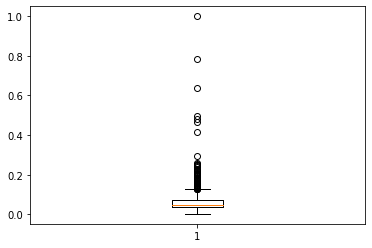

In [16]:
#univariate check outliers
plt.boxplot((continous_df['ApplicantIncome'])/continous_df['ApplicantIncome'].max())

In [21]:
continous_df.shape

(614, 5)

In [20]:
# np.log2(continous_df['ApplicantIncome'])

## box plot

In [28]:
%matplotlib inline

def scatter_plot(data):
    for name in data:
        for da in data:
            plt.scatter(data[name],data[da])
            sns.regplot(data[name],data[da])
            plt.title(name)
            plt.xlabel(name)
            plt.ylabel(da)
            plt.show()
            
def histogram_plot(data):
    for name in data:
        plt.hist(np.log(data[name]),bins=20)
        plt.title(name)
        plt.xlabel('count')
        plt.ylabel(name)
        plt.show()
        

def box_plot(data):
    for name in data:
        plt.boxplot(data[name])
        plt.title(name)
        plt.show()

def box_plot_log(data):
    for name in data:
        plt.boxplot(np.log(data[name]))
        plt.title(name)
        plt.show()

In [30]:
%matplotlib inline
box_plot(continous_df)

UsageError: Line magic function `%` not found.


### dedecting outlier using z-score

formula for z-score =(observation-mean)standard deviation

z=(X-mu)/std

In [33]:
outlier=[]

def detect_outliers(data):
    
    thershold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>thershold:
            outlier.append(i)
    return outlier

In [35]:
detect_outliers(continous_df['CoapplicantIncome'])

[23803,
 39999,
 51763,
 33846,
 39147,
 63337,
 81000,
 37719,
 10968.0,
 11300.0,
 20000.0,
 20000.0,
 33837.0,
 41667.0]

## find outlier using quantile range
 
steps
1. Arrange the dat in increasing order
2. calculate the 1st(q1) and 3rd quantile(q3)
3. find interquantile range(q3-q1)
4. find lower bound q1*1.5
5. find upper bound q3*1.5

In [36]:
sorted(continous_df["ApplicantIncome"])

[150,
 210,
 416,
 645,
 674,
 1000,
 1025,
 1025,
 1299,
 1378,
 1442,
 1500,
 1538,
 1600,
 1625,
 1668,
 1759,
 1782,
 1800,
 1800,
 1809,
 1811,
 1820,
 1820,
 1828,
 1830,
 1836,
 1853,
 1863,
 1875,
 1880,
 1907,
 1916,
 1926,
 1928,
 1958,
 1958,
 1963,
 1977,
 1993,
 2000,
 2014,
 2014,
 2031,
 2045,
 2058,
 2060,
 2071,
 2083,
 2083,
 2130,
 2132,
 2137,
 2138,
 2149,
 2165,
 2167,
 2178,
 2192,
 2213,
 2213,
 2214,
 2221,
 2237,
 2239,
 2253,
 2275,
 2281,
 2297,
 2301,
 2309,
 2330,
 2333,
 2333,
 2333,
 2346,
 2366,
 2378,
 2378,
 2383,
 2383,
 2395,
 2400,
 2400,
 2400,
 2400,
 2423,
 2425,
 2435,
 2439,
 2454,
 2473,
 2479,
 2479,
 2483,
 2484,
 2491,
 2492,
 2499,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2507,
 2510,
 2526,
 2550,
 2577,
 2583,
 2583,
 2583,
 2583,
 2600,
 2600,
 2600,
 2600,
 2600,
 2600,
 2609,
 2620,
 2625,
 2645,
 2647,
 2653,
 2661,
 2666,
 2666,
 2667,
 2679,
 2698,
 2699,
 2708,
 2717,
 2718,
 2720,
 2726,
 2750,
 2755,
 276

In [39]:
#find q1 and q3
quantile1,quantile3=np.percentile(continous_df['ApplicantIncome'],[25,75])
print(quantile1,quantile3)

2877.5 5795.0


In [40]:
#find iqr
iqr_value=quantile3-quantile1
print(iqr_value)

2917.5


In [41]:
#find upper and lower bound value
lower_bound_val=quantile1-(1.5 * iqr_value)
upper_bound_val=quantile3-(1.5 * iqr_value)

In [42]:
print(lower_bound_val,upper_bound_val)

-1498.75 1418.75


# Testing data

In [43]:
testing_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [44]:
testing_data.shape

(367, 12)

In [45]:
testing_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [46]:
test_df=testing_data.copy()
cat_test_data=test_df.select_dtypes(include=['object'])
cont_test_data=test_df.select_dtypes(include=['float64','int64'])


In [47]:
cat_test_data.isnull().sum()

Loan_ID           0
Gender           11
Married           0
Dependents       10
Education         0
Self_Employed    23
Property_Area     0
dtype: int64

In [48]:
for name in cat_test_data.drop(columns='Loan_ID'):
    print(name)
    print(cat_test_data[name].value_counts())
    print(f"null values {cat_test_data[name].isnull().sum()}")
    print("================================")

Gender
Male      286
Female     70
Name: Gender, dtype: int64
null values 11
Married
Yes    233
No     134
Name: Married, dtype: int64
null values 0
Dependents
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64
null values 10
Education
Graduate        283
Not Graduate     84
Name: Education, dtype: int64
null values 0
Self_Employed
No     307
Yes     37
Name: Self_Employed, dtype: int64
null values 23
Property_Area
Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64
null values 0


In [49]:
cat_test_data["Gender"].fillna('Male',inplace=True)
cat_test_data["Dependents"].fillna(0,inplace=True)
cat_test_data["Self_Employed"].fillna('No',inplace=True)

/home/rahish/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [50]:
cat_test_data.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [51]:
cont_test_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
dtype: int64

In [52]:
for name in cont_test_data:
    print(name)
    if (len(cont_test_data[name].value_counts())<10):
        print(cont_test_data[name].value_counts())
        print(f"null values {cont_test_data[name].isnull().sum()}")
    print("================================")

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
1.0    279
0.0     59
Name: Credit_History, dtype: int64
null values 29


In [53]:
cont_test_data["LoanAmount"].fillna(cont_test_data["LoanAmount"].mean(),inplace=True)
cont_test_data["Loan_Amount_Term"].fillna(cont_test_data['Loan_Amount_Term'].mean(),inplace=True)
cont_test_data["Credit_History"].fillna(cont_test_data["Credit_History"].mean(),inplace=True)

In [54]:
cont_test_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [55]:
test_df=cat_test_data.join(cont_test_data) 

In [56]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [57]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,Male,Yes,0,Graduate,No,Urban,5720,0,110.0,360.0,1.000000
1,LP001022,Male,Yes,1,Graduate,No,Urban,3076,1500,126.0,360.0,1.000000
2,LP001031,Male,Yes,2,Graduate,No,Urban,5000,1800,208.0,360.0,1.000000
3,LP001035,Male,Yes,2,Graduate,No,Urban,2340,2546,100.0,360.0,0.825444
4,LP001051,Male,No,0,Not Graduate,No,Urban,3276,0,78.0,360.0,1.000000


In [58]:
training_data=catagory_df.join(continous_df)

In [59]:
training_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

## save the clean data in csv format

In [60]:

training_data.to_csv('loan/clean_training.csv')


In [41]:
# import os
# os.mkdir('loan',)

In [42]:
test_df.to_csv("loan/clean_test_data.csv")

In [61]:
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,Y,5849,0.0,146.412162,360.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.000000,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.000000,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.000000,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.000000,360.0,1.0


In [62]:
continous_df.head(100)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.000000
1,4583,1508.0,128.000000,360.0,1.000000
2,3000,0.0,66.000000,360.0,1.000000
3,2583,2358.0,120.000000,360.0,1.000000
4,6000,0.0,141.000000,360.0,1.000000
5,5417,4196.0,267.000000,360.0,1.000000
6,2333,1516.0,95.000000,360.0,1.000000
7,3036,2504.0,158.000000,360.0,0.000000
8,4006,1526.0,168.000000,360.0,1.000000
9,12841,10968.0,349.000000,360.0,1.000000


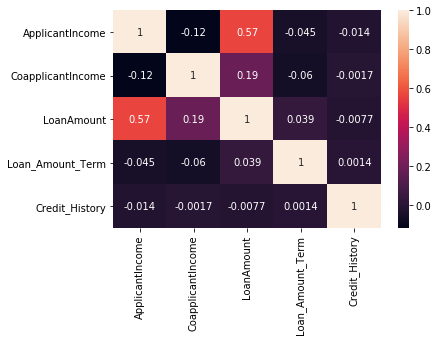

In [63]:
sns.heatmap(continous_df.corr(),annot=True)

## show the some outliers using graph

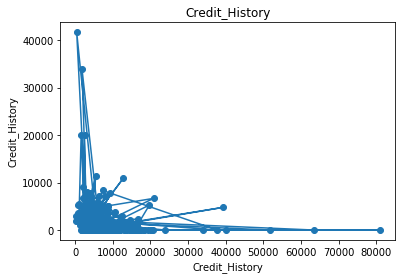

In [49]:
plt.scatter(continous_df['ApplicantIncome'],continous_df['CoapplicantIncome'])
#sns.regplot(continous_df['ApplicantIncome'],continous_df['CoapplicantIncome'])
plt.plot(continous_df['ApplicantIncome'],continous_df['CoapplicantIncome'])
plt.title(name)
plt.xlabel(name)
plt.ylabel(name)
plt.show()

(array([434., 127.,  36.,  10.,   1.,   2.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([    0.  ,  2083.35,  4166.7 ,  6250.05,  8333.4 , 10416.75,
        12500.1 , 14583.45, 16666.8 , 18750.15, 20833.5 , 22916.85,
        25000.2 , 27083.55, 29166.9 , 31250.25, 33333.6 , 35416.95,
        37500.3 , 39583.65, 41667.  ]),
 <a list of 20 Patch objects>)

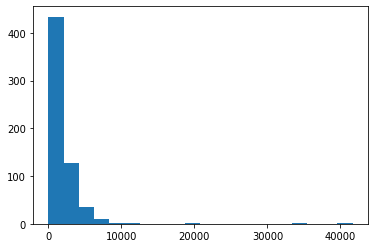

In [50]:
plt.hist((continous_df['CoapplicantIncome']),bins=20)

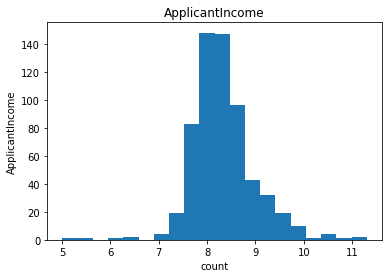

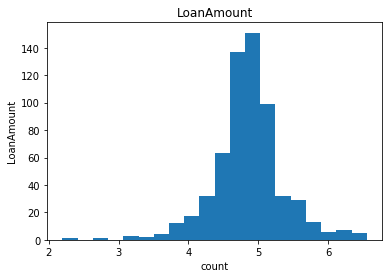

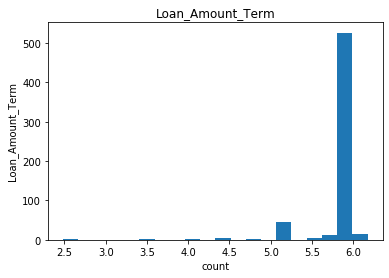

In [51]:
histogram_plot(continous_df.drop(columns=['CoapplicantIncome','Credit_History'],axis=1))

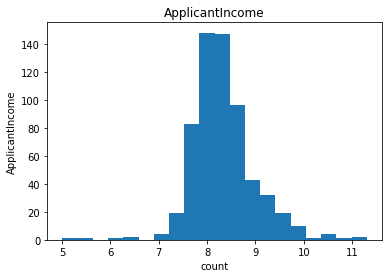

/home/rahish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


ValueError: supplied range of [-inf, 10.637464727584328] is not finite

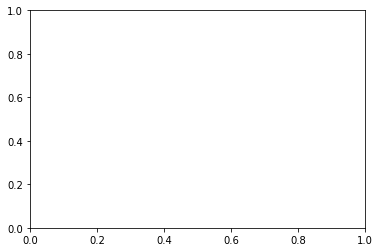

In [52]:
histogram_plot(continous_df)

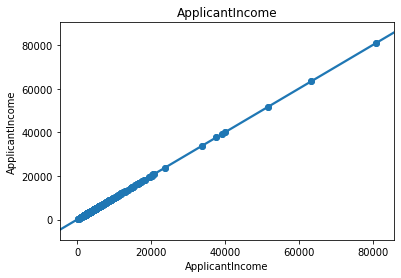

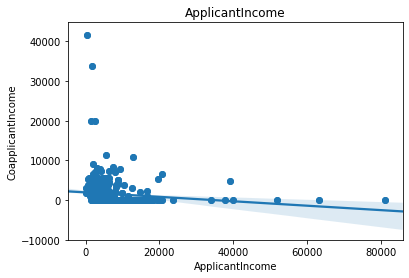

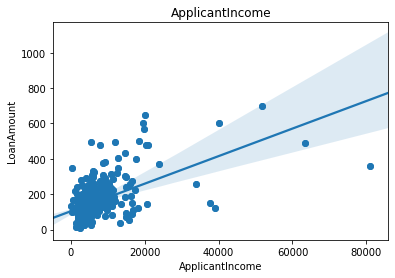

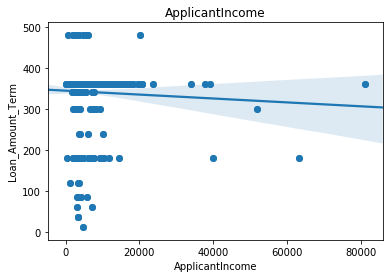

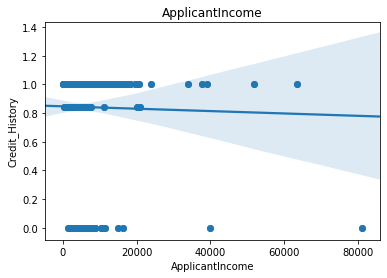

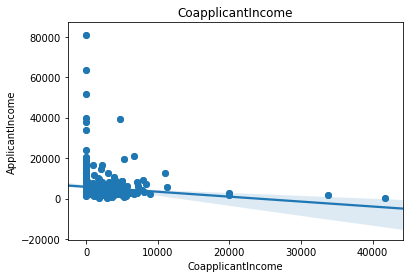

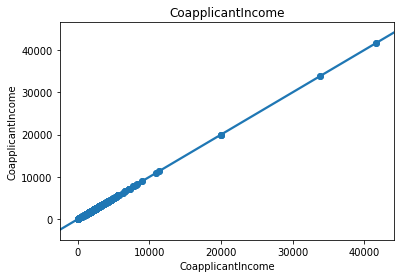

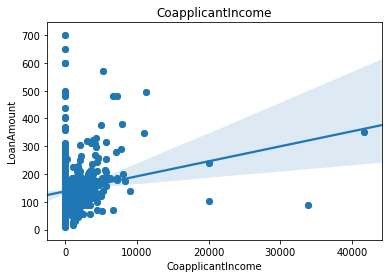

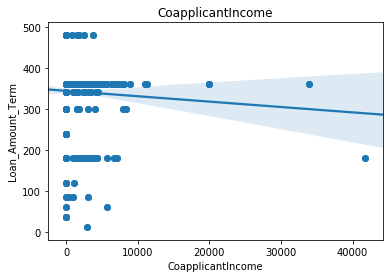

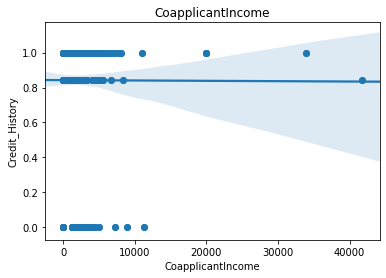

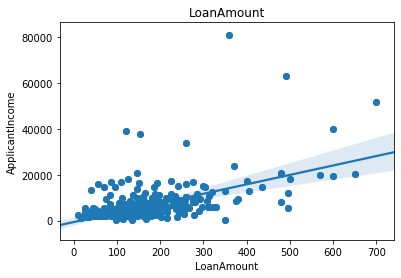

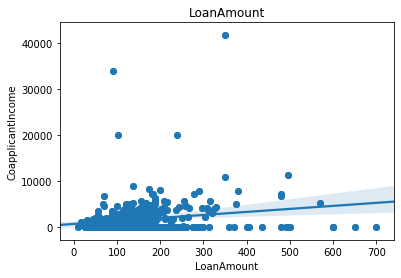

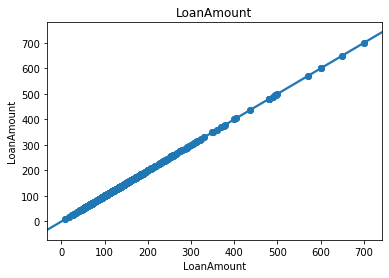

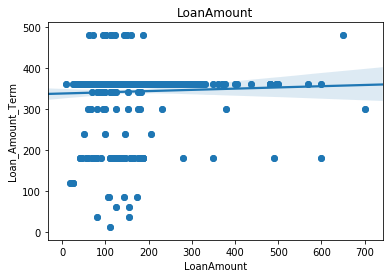

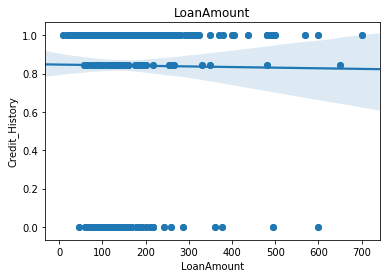

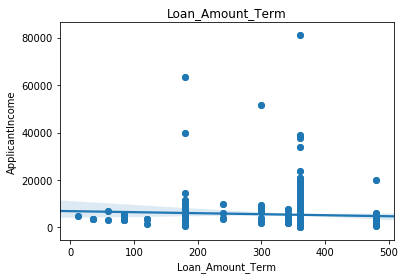

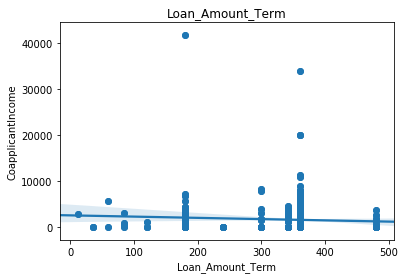

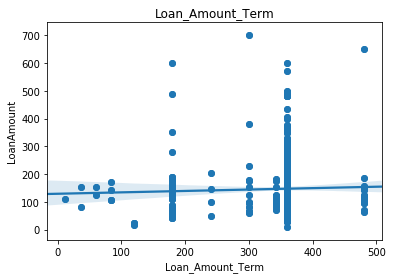

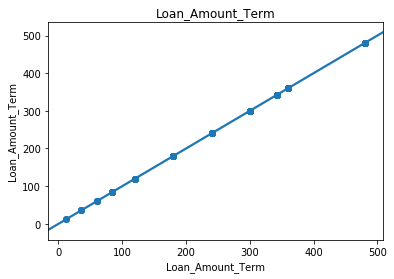

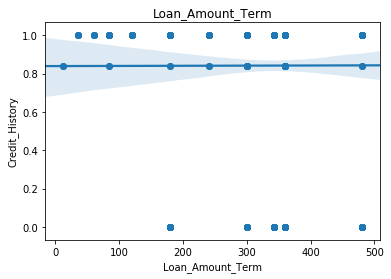

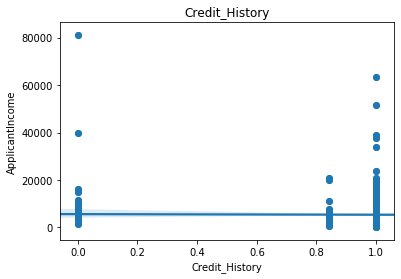

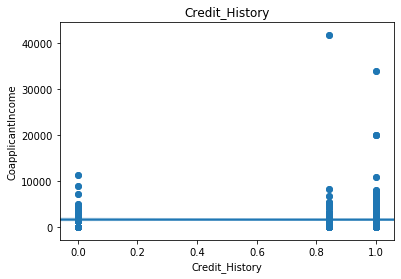

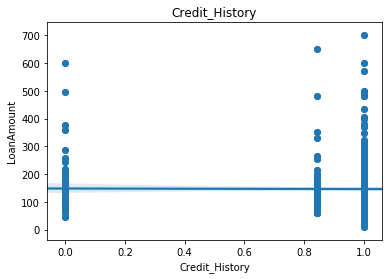

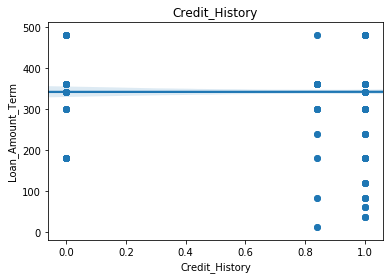

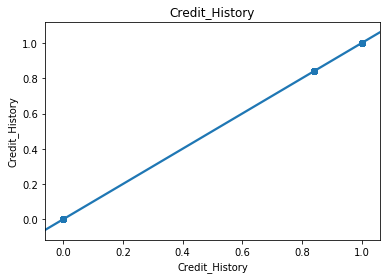

In [64]:
scatter_plot(continous_df)

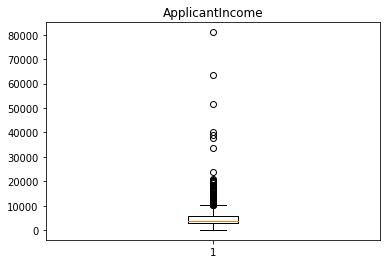

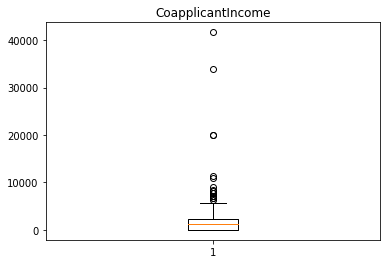

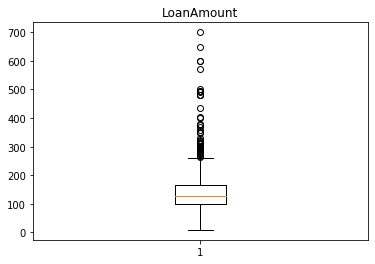

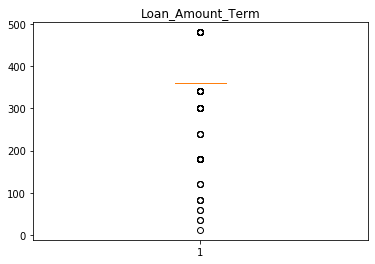

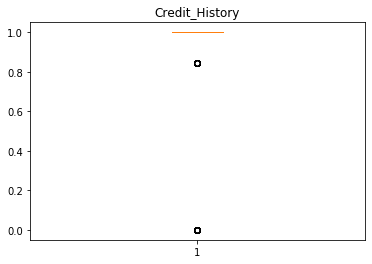

In [65]:
box_plot(continous_df)

## train the data with different ml algorithms

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV 

In [67]:
training=pd.read_csv('loan/clean_training.csv')
training_data=training.copy()


In [68]:
training_data.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Property_Area         object
Loan_Status           object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
training_data["Gender"]=le.fit_transform(training_data["Gender"])

In [70]:
training_data["Education"]=le.fit_transform(training_data["Education"])

In [71]:
training_data.drop(['Unnamed: 0',"Loan_ID"],axis=1,inplace=True)

In [72]:
training_data["Dependents"]=le.fit_transform(training_data["Dependents"])

In [73]:
training_data["Married"]=le.fit_transform(training_data["Married"])

In [74]:
training_data["Self_Employed"]=le.fit_transform(training_data["Self_Employed"])
training_data["Property_Area"]=le.fit_transform(training_data["Property_Area"])
training_data["Loan_Status"]=le.fit_transform(training_data["Loan_Status"])

In [75]:
x=training_data.drop('Loan_Status',axis=1)

In [76]:
training_data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
Property_Area          int64
Loan_Status            int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [77]:
training_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,0,4583,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,1,3000,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,1,2583,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,1,6000,0.0,141.000000,360.0,1.0
5,1,1,2,0,1,2,1,5417,4196.0,267.000000,360.0,1.0
6,1,1,0,1,0,2,1,2333,1516.0,95.000000,360.0,1.0
7,1,1,3,0,0,1,0,3036,2504.0,158.000000,360.0,0.0
8,1,1,2,0,0,2,1,4006,1526.0,168.000000,360.0,1.0
9,1,1,1,0,0,1,0,12841,10968.0,349.000000,360.0,1.0


In [78]:
# training_data["Married"]=np.where(training_data["Married"]=="Yes",1,0)
# training_data["Education"]=np.where(training_data["Education"]=="Graduate",1,0)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(training_data.drop('Loan_Status',axis=1),training_data['Loan_Status'],
                                              test_size=0.3,random_state=12)

In [80]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
389,1,1,0,0,0,0,5488,0.0,125.0,360.0,1.0
456,1,1,0,0,0,2,4301,0.0,118.0,360.0,1.0
268,0,0,0,0,0,0,3418,0.0,135.0,360.0,1.0
320,1,1,0,0,0,1,2400,2167.0,115.0,360.0,1.0
41,1,0,0,0,0,2,1800,1213.0,47.0,360.0,1.0


# models

## 1. logistic regression 

In [81]:
lr=LogisticRegressionCV()
lr.fit(x_train,y_train)

/home/rahish/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [82]:
from sklearn.metrics import accuracy_score ,classification_report

In [83]:
predict=lr.predict(x_test)

In [84]:
accuracy_score(y_test,predict)

0.8162162162162162

In [85]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.53      0.65        58
           1       0.82      0.94      0.88       127

    accuracy                           0.82       185
   macro avg       0.82      0.74      0.76       185
weighted avg       0.82      0.82      0.80       185



## 2. decision tree classifier

In [87]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
pre=dtree.predict(x_test)

In [89]:
acc=accuracy_score(y_test,pre)

In [90]:
acc

0.7027027027027027

## 3. naive bayes (gaussianNB)

In [91]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [92]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
gb_predi=gnb.predict(x_test)

In [94]:
gn_acc=accuracy_score(y_test,gb_predi)

In [95]:
gn_acc

0.8108108108108109

## 4. svm classifier model

In [96]:
from sklearn.svm import SVC
svc=SVC()

In [97]:
svc.fit(x_train,y_train)

/home/rahish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [98]:
svc_pre=svc.predict(x_test)

In [99]:
print(accuracy_score(y_test,svc_pre))

0.6864864864864865


## now test our data with more accuracy score model here is  logistic regression

In [100]:
teest=pd.read_csv('loan/clean_test_data.csv')

In [101]:
teest.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,LP001015,Male,Yes,0,Graduate,No,Urban,5720,0,110.0,360.0,1.000000
1,1,LP001022,Male,Yes,1,Graduate,No,Urban,3076,1500,126.0,360.0,1.000000
2,2,LP001031,Male,Yes,2,Graduate,No,Urban,5000,1800,208.0,360.0,1.000000
3,3,LP001035,Male,Yes,2,Graduate,No,Urban,2340,2546,100.0,360.0,0.825444
4,4,LP001051,Male,No,0,Not Graduate,No,Urban,3276,0,78.0,360.0,1.000000


In [102]:
teest.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Property_Area         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [103]:
teest["Dependents"]=le.fit_transform(teest["Dependents"])

In [104]:
teest["Married"]=le.fit_transform(teest["Married"])
teest["Education"]=le.fit_transform(teest["Education"])
teest["Self_Employed"]=le.fit_transform(teest["Self_Employed"])
teest["Property_Area"]=le.fit_transform(teest["Property_Area"])

In [105]:
teest.drop(['Unnamed: 0','Loan_ID'],axis=1,inplace=True)

In [106]:
teest['Gender']=le.fit_transform(teest['Gender'])

In [107]:
teest.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,2,5720,0,110.0,360.0,1.000000
1,1,1,1,0,0,2,3076,1500,126.0,360.0,1.000000
2,1,1,2,0,0,2,5000,1800,208.0,360.0,1.000000
3,1,1,2,0,0,2,2340,2546,100.0,360.0,0.825444
4,1,0,0,1,0,2,3276,0,78.0,360.0,1.000000


In [108]:
pred_tesst=lr.predict(teest)

In [108]:
# for t in cat_test:
#         teest[t]=le.transform(teest[t])
# teest.head()

In [109]:
#cahnge in dummies variables (here is optional)
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder()

In [114]:
teest.shape

(367, 11)

In [115]:
test=teest.copy()

In [116]:
test.drop(teest.select_dtypes(['object']),axis=1,inplace=True)

In [117]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,2,5720,0,110.0,360.0,1.000000
1,1,1,1,0,0,2,3076,1500,126.0,360.0,1.000000
2,1,1,2,0,0,2,5000,1800,208.0,360.0,1.000000
3,1,1,2,0,0,2,2340,2546,100.0,360.0,0.825444
4,1,0,0,1,0,2,3276,0,78.0,360.0,1.000000


In [118]:
test=test.join(cat)

In [119]:
test.shape

(367, 11)

In [120]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,2,5720,0,110.0,360.0,1.000000
1,1,1,1,0,0,2,3076,1500,126.0,360.0,1.000000
2,1,1,2,0,0,2,5000,1800,208.0,360.0,1.000000
3,1,1,2,0,0,2,2340,2546,100.0,360.0,0.825444
4,1,0,0,1,0,2,3276,0,78.0,360.0,1.000000


## now we  predcit the real world data by passing a single data set

In [129]:
m=np.array([[1,0,0,0,0,2,5849,0.0,146,360.0,1.0]])
n=np.array([[0,1,0,1,0,2,5349,1,155,360.0,1.0]])
b=np.array([[1,0,1,1,0,1,5849,0.0,136,330.0,0.0]])
g=np.array([[0,0,0,1,0,0,5239,0.0,103,300.0,1.0]])

In [130]:
m.shape

(1, 11)

In [132]:
print(lr.predict(m))
print(lr.predict(n))
print(lr.predict(b))
print(lr.predict(g))

[1]
[1]
[0]
[1]


## now save the model in pkl and json and h5 format

In [133]:
#pickle 
pickle.dump(lr,open('model.pkl','wb'))


In [134]:
model=pickle.load(open('model.pkl','rb'))
print(model.predict(g))

[1]
